In [1]:
#sys path
from sys import path
from pathlib import Path

module_path = str(Path.cwd().parents[1])

if module_path not in path:
    path.append(module_path)
    
path.append(module_path + '\\functions')


# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import pandapower as pp
import pandapower.networks as net
import pandapower.topology as top
import pandapower.plotting as plot
import pandapower.converter
import pandapower.estimation

import time

pd.set_option('display.max_columns', 100)

import save_outputs

ModuleNotFoundError: No module named 'save_outputs'

# Power System - case9

In [2]:
net = pandapower.networks.case9()
net

This pandapower network includes the following parameter tables:
   - bus (9 elements)
   - load (3 elements)
   - gen (2 elements)
   - ext_grid (1 element)
   - line (9 elements)
   - poly_cost (3 elements)
   - bus_geodata (9 elements)

In [3]:
net.bus

,in_service,max_vm_pu,min_vm_pu,name,type,vn_kv,zone
0,True,1.1,0.9,1,b,345.0,1
1,True,1.1,0.9,2,b,345.0,1
2,True,1.1,0.9,3,b,345.0,1
3,True,1.1,0.9,4,b,345.0,1
4,True,1.1,0.9,5,b,345.0,1
5,True,1.1,0.9,6,b,345.0,1
6,True,1.1,0.9,7,b,345.0,1
7,True,1.1,0.9,8,b,345.0,1
8,True,1.1,0.9,9,b,345.0,1


In [4]:
net.load

,bus,const_i_percent,const_z_percent,controllable,in_service,name,p_mw,q_mvar,scaling,sn_mva,type
0,4,0.0,0.0,False,True,None,90.0,30.0,1.0,NaN,None
1,6,0.0,0.0,False,True,None,100.0,35.0,1.0,NaN,None
2,8,0.0,0.0,False,True,None,125.0,50.0,1.0,NaN,None


In [5]:
pp.create_sgen(net, bus=3, p_mw=50, q_mvar=15, controllable=False)
pp.create_sgen(net, bus=5, p_mw=30, q_mvar=10, controllable=False)

net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,controllable
0,None,3,50.0,15.0,NaN,1.0,True,wye,True,False
1,None,5,30.0,10.0,NaN,1.0,True,wye,True,False


In [6]:
net.gen

,bus,controllable,in_service,name,p_mw,scaling,sn_mva,type,vm_pu,slack,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,1,True,True,None,163.0,1.0,NaN,None,1.0,False,300.0,10.0,300.0,-300.0
1,2,True,True,None,85.0,1.0,NaN,None,1.0,False,270.0,10.0,300.0,-300.0


In [7]:
net.ext_grid 

,bus,in_service,name,va_degree,vm_pu,max_p_mw,min_p_mw,max_q_mvar,min_q_mvar
0,0,True,None,0.0,1.0,250.0,10.0,300.0,-300.0


In [8]:
net.line

,c_nf_per_km,df,from_bus,g_us_per_km,in_service,length_km,max_i_ka,max_loading_percent,name,parallel,r_ohm_per_km,std_type,to_bus,type,x_ohm_per_km
0,0.000000,1.0,0,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,3,ol,68.558400
1,352.117636,1.0,3,0.0,True,1.0,0.418370,100.0,None,1,20.234250,None,4,ol,109.503000
2,797.836164,1.0,4,0.0,True,1.0,0.251022,100.0,None,1,46.419750,None,5,ol,202.342500
3,0.000000,1.0,2,0.0,True,1.0,0.502044,100.0,None,1,0.000000,None,5,ol,69.748650
4,465.775861,1.0,5,0.0,True,1.0,0.251022,100.0,None,1,14.163975,None,6,ol,119.977200
5,332.060303,1.0,6,0.0,True,1.0,0.418370,100.0,None,1,10.117125,None,7,ol,85.698000
6,0.000000,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,0.000000,None,1,ol,74.390625
7,681.949347,1.0,7,0.0,True,1.0,0.418370,100.0,None,1,38.088000,None,8,ol,191.630250
8,392.232304,1.0,8,0.0,True,1.0,0.418370,100.0,None,1,11.902500,None,3,ol,101.171250


In [9]:
net.poly_cost

,element,et,cp0_eur,cp1_eur_per_mw,cp2_eur_per_mw2,cq0_eur,cq1_eur_per_mvar,cq2_eur_per_mvar2
0,0,ext_grid,150.0,5.0,0.1100,0.0,0.0,0.0
1,0,gen,600.0,1.2,0.0850,0.0,0.0,0.0
2,1,gen,335.0,1.0,0.1225,0.0,0.0,0.0


1 in collections is of unknown type. Skipping


Arc: Arc(xy=(4.45003, 2.91221), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)
Arc: Arc(xy=(2.45003, -0.087788), width=0.075, height=0.15, angle=0, theta1=245, theta2=300)


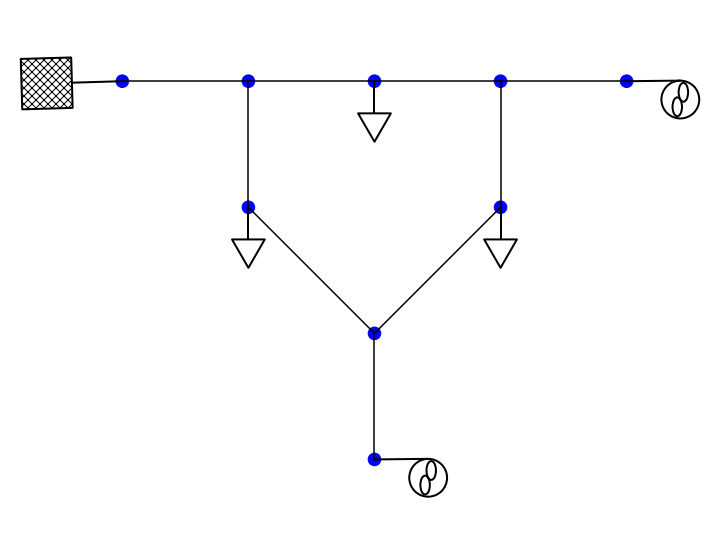

In [10]:
net.bus_geodata['x'] = pd.Series([0,4,2,1,1,2,3,3,2])
net.bus_geodata['y'] = pd.Series([3,3,0,3,2,1,2,3,3])
#net.bus_geodata

import pylab

def plot_net():
    bus_col = plot.create_bus_collection(net, color="b", size=0.05, picker=True)
    trafo_col = plot.create_trafo_collection(net, size=0.1)
    line_col = plot.create_line_collection(net, color="k", use_bus_geodata=True)
    ext_grid_col = plot.create_ext_grid_collection(net, size=0.2, orientation=-1.6)
    load_col = plot.create_load_collection(net, size=0.15, orientation=np.pi)
    #sgen_col = plot.create_sgen_collection(net, size=0.15, orientation=np.pi)
    gen_col = plot.create_gen_collection(net, size=0.15, orientation=1.9)
    #sgen_col = plt.create_sgen_collections(net, size=0.1, infofunc=None, orientation=np.pi)
    plot.draw_collections([bus_col, trafo_col, line_col,
                          ext_grid_col, load_col, gen_col], figsize=(10, 8))
    pylab.show()

plot_net()

# PF

In [11]:
input_dict = save_outputs.load_model('inputs\IEEE9_TA1_hybrid')

x_d = np.array(input_dict['xd'])
xd_std = np.array(input_dict['xd_std'])
u = np.array(input_dict['u'])

In [12]:
X_d = x_d
P_cont = u

In [14]:
# Load base
L_P_base = net.load['p_mw']
L_Q_base = net.load['q_mvar']

# RS base
RS_P_base = net.sgen['p_mw']
RS_Q_base = net.sgen['q_mvar']

# Load factor
faktor_load = L_Q_base/L_P_base
# RS factor
faktor_rs = RS_Q_base/RS_P_base

In [15]:
n = net.gen.shape[0]
np.random.seed(123)

V_m = pd.DataFrame([])
V_deg = pd.DataFrame([])
P = pd.DataFrame([])
Q = pd.DataFrame([])

P_ij = pd.DataFrame([])


Pg = pd.DataFrame()
Pg_0 = pd.DataFrame()
load_p = pd.DataFrame()
load_q = pd.DataFrame()
rs_p = pd.DataFrame()
rs_q = pd.DataFrame()

count = P_cont.shape[0]

t = -time.time()
for j in range(count):

    n_sim = 1
    
    for i in range(n_sim):
        net.load['p_mw'] = pd.Series(X_d[j,:3].flatten())
        net.sgen['p_mw'] = pd.Series(X_d[j,3:].flatten())
    
        net.load['q_mvar'] = pd.Series(net.load['p_mw'] * faktor_load)
        net.sgen['q_mvar'] = pd.Series(net.sgen['p_mw'] * faktor_rs)
        
        load_p = pd.concat([load_p, net.load['p_mw']], axis=1)
        load_q = pd.concat([load_q, net.load['q_mvar']], axis=1)
        
        rs_p = pd.concat([rs_p, net.sgen['p_mw']], axis=1)
        rs_q = pd.concat([rs_q, net.sgen['q_mvar']], axis=1)
    
        net.ext_grid['p_mw'] = pd.Series(P_cont[j, 0].flatten())
        
        net.gen['p_mw'] = pd.Series(P_cont[j, 1:].flatten())
    
        Pg_0 = pd.concat([Pg_0, net.ext_grid['p_mw']], axis=1)
        Pg = pd.concat([Pg, net.gen['p_mw']], axis=1)
    
        pp.runpp(net)
    
        V_m = V_m.append(pd.DataFrame(net.res_bus['vm_pu']).T)
        V_deg = V_deg.append(pd.DataFrame(net.res_bus['va_degree']).T)
        P = P.append(pd.DataFrame(net.res_bus['p_mw']).T)
        Q = Q.append(pd.DataFrame(net.res_bus['q_mvar']).T)
        
        P_ij = P_ij.append(pd.DataFrame(net.res_line['p_from_mw']).T)
    
        if i == (n_sim-1):
            V_m = V_m.reset_index(drop=True)
            V_deg = V_deg.reset_index(drop=True)
            P = P.reset_index(drop=True)
            Q = Q.reset_index(drop=True)
            P_ij = P_ij.reset_index(drop=True)
            
            
t += time.time()
print('Time of solver:', t)

Time of solver: 4.244523525238037


# Dataset

In [16]:
load_p = load_p.transpose()
load_p = load_p.reset_index()
load_p = load_p.drop(['index'], axis=1)
load_p.columns = ['Load_P1', 'Load_P2' ,'Load_P3']

rs_p = rs_p.transpose()
rs_p = rs_p.reset_index()
rs_p = rs_p.drop(['index'], axis=1)
rs_p.columns = ['RS_P1', 'RS_P2']


load_q = load_q.transpose()
load_q = load_q.reset_index()
load_q = load_q.drop(['index'], axis=1)
load_q.columns = ['Load_Q1', 'Load_Q2' ,'Load_Q3']

rs_q = rs_q.transpose()
rs_q = rs_q.reset_index()
rs_q = rs_q.drop(['index'], axis=1)
rs_q.columns = ['RS_Q1', 'RS_Q2']

In [17]:
Pg0 = pd.DataFrame(Pg_0.iloc[0])
Pg1 = pd.DataFrame(Pg.iloc[0])
Pg2 = pd.DataFrame(Pg.iloc[1])

Pg0 = Pg0.reset_index()
Pg0 = Pg0.drop(['index'], axis=1)
Pg0.columns = ['Pg0']

Pg1 = Pg1.reset_index()
Pg1 = Pg1.drop(['index'], axis=1)
Pg1.columns = ['Pg1']

Pg2 = Pg2.reset_index()
Pg2 = Pg2.drop(['index'], axis=1)
Pg2.columns = ['Pg2']

In [18]:
P.columns = ['P0', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8']
Q.columns = ['Q0', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8']
V_m.columns = ['U0', 'U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8']
V_deg.columns = ['Ud0', 'Ud2', 'Ud2', 'Ud3', 'Ud4', 'Ud5', 'Ud6', 'Ud7', 'Ud8']
P_ij.columns = ['P_03', 'P_34', 'P_45', 'P_25', 'P_56', 'P_67', 'P_71', 'P_78', 'P_83']

In [19]:
df = pd.concat([Pg0, Pg1, Pg2, load_p, load_q, rs_p, rs_q, P, Q, V_m, V_deg, P_ij], axis=1)

In [20]:
pd.set_option('display.max_columns', 100)
df

,Pg0,Pg1,Pg2,Load_P1,Load_P2,Load_P3,Load_Q1,Load_Q2,Load_Q3,RS_P1,RS_P2,RS_Q1,RS_Q2,P0,P1,P2,P3,P4,P5,P6,P7,P8,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,U0,U1,U2,U3,U4,U5,U6,U7,U8,Ud0,Ud2,Ud2,Ud3,Ud4,Ud5,Ud6,Ud7,Ud8,P_03,P_34,P_45,P_25,P_56,P_67,P_71,P_78,P_83
0,61.502445,101.94434,71.553215,90.0,100.0,125.0,30.0,35.0,50.0,50.0,30.0,15.0,10.0,-64.849116,-101.94434,-71.553215,-50.0,90.0,-30.0,100.0,0.0,125.0,-3.381189,-1.954189,16.785059,-15.0,30.0,-10.0,35.0,0.0,50.0,1.0,1.0,1.0,0.998751,0.986995,1.010706,0.991671,1.000809,0.970411,0.0,2.971153,2.690221,-2.14335,-4.353747,0.312565,-2.629351,-0.678978,-5.627862,64.849116,42.384469,-47.927282,71.553215,52.706058,-47.640953,-101.94434,54.10393,-71.86577


# Save

In [21]:
df.to_csv(module_path + '\\IEEE9\\datasets\\dataset_tested_real_AC.csv')